# Comparison Example


In this notebook, we show some examples of comparisons between simulations of theoretical models and experimental data, being this the main goal of our software in the long term. 

This aspect of the NeuralPlayground (NPG) software is still under development. With time, we want to implement tools exclusively made to compare simulated and experimental data, such as a GUI to quickly navigate through the results, add more metrics to measure the performance of agents or similarity between neural representation.

For now, this notebook uses the three main modules of NPG, "experiments", "arenas" and "agents", to simulate theoretical models and compare with what is seen in neural recording from real experiments.  The "simulation manager" is used to run and keep track of the state of all of your runs and available results ( For ease, the results of the simulations are saved on the gin repository and fetched). 
We use the gridscore metric implemented in the framework, to compare the performance of the different model implemented as well as direct visual comparison.

In [14]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data, Sargolini2006Data
from neuralplayground.comparison import GridScorer
from neuralplayground.arenas import Simple2D, ConnectedRooms,Wernle2018, MergingRoom, Sargolini2006
from neuralplayground.agents import Weber2018, Stachenfeld2018
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data
from neuralplayground.saved_models import fetch_model_path
from neuralplayground.plotting.plot_utils import make_plot_trajectories , make_plot_rate_map, make_agent_comparison

# Different Agents in Same environement


We compare two agents in the same environement and compare their representations. The runs have been previoulsy run using the simulation manager, the output was saved to the gin repositiory for ease.

## 2D environment

/Users/clementine/Documents/UCL/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig10'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-1.1191'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.1237'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>]],
      dtype=object)

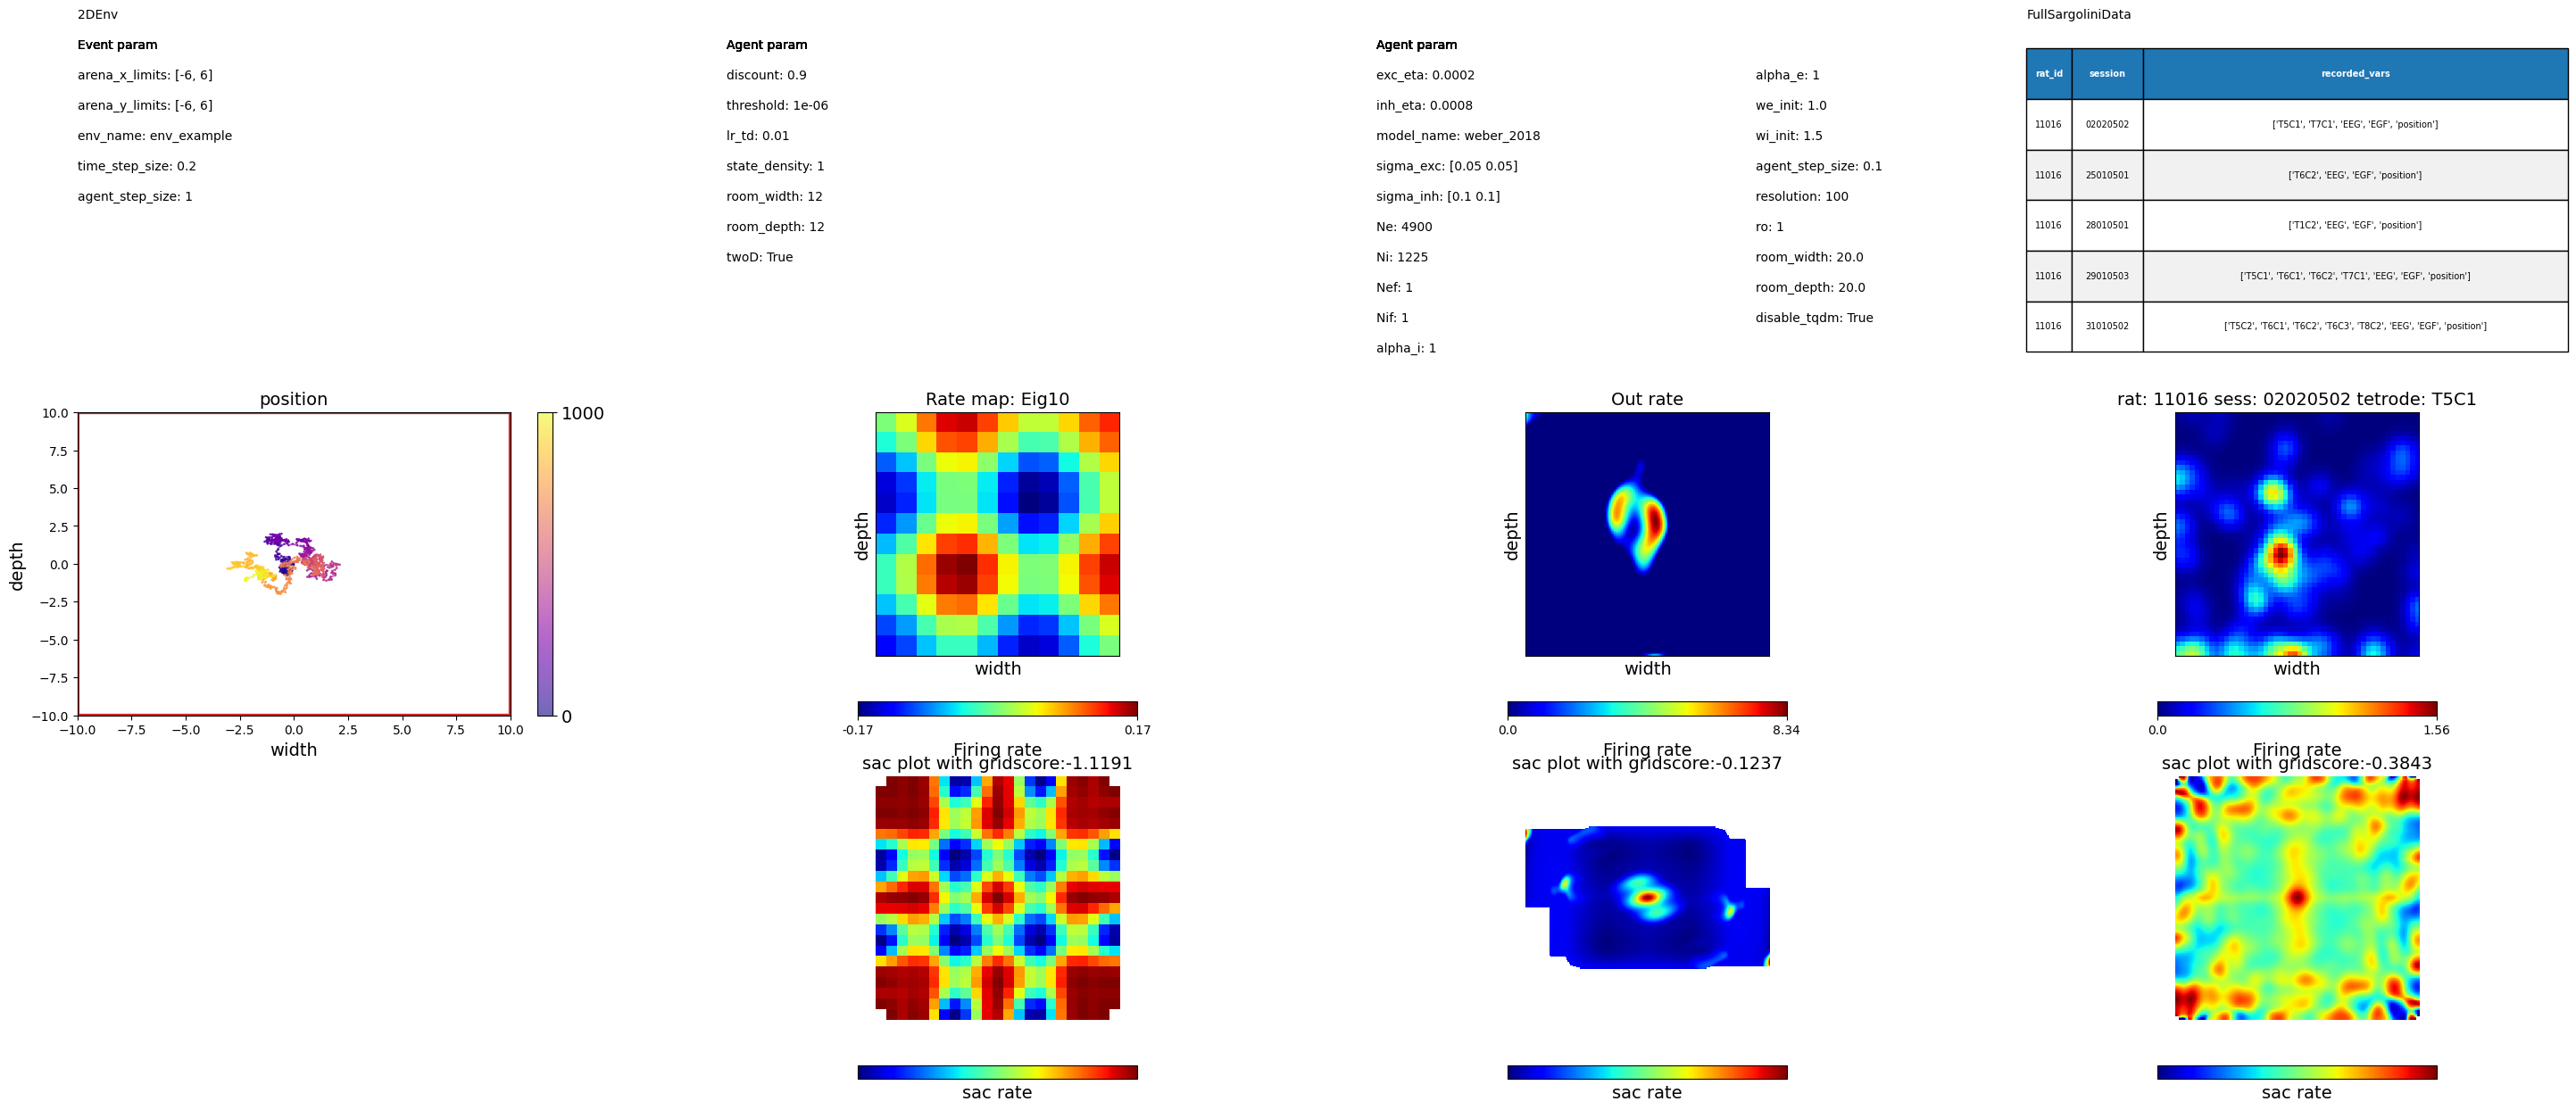

In [15]:
data_path = fetch_model_path("stachenfeld_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)

data_path = fetch_model_path("weber_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'



env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]
exp=[exp]

make_agent_comparison(env, parameters,agents, exps=exp , recording_index=0,GridScorer=GridScorer)


## Sargolini environment

/Users/clementine/Documents/UCL/NeuralPlayground/neuralplayground/comparison/metrics.py:120: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/Users/clementine/Documents/UCL/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig14'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-1.1442'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.2076'}, xlabel='width', ylabel='depth'>],
       [<Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >]], dtype=object)

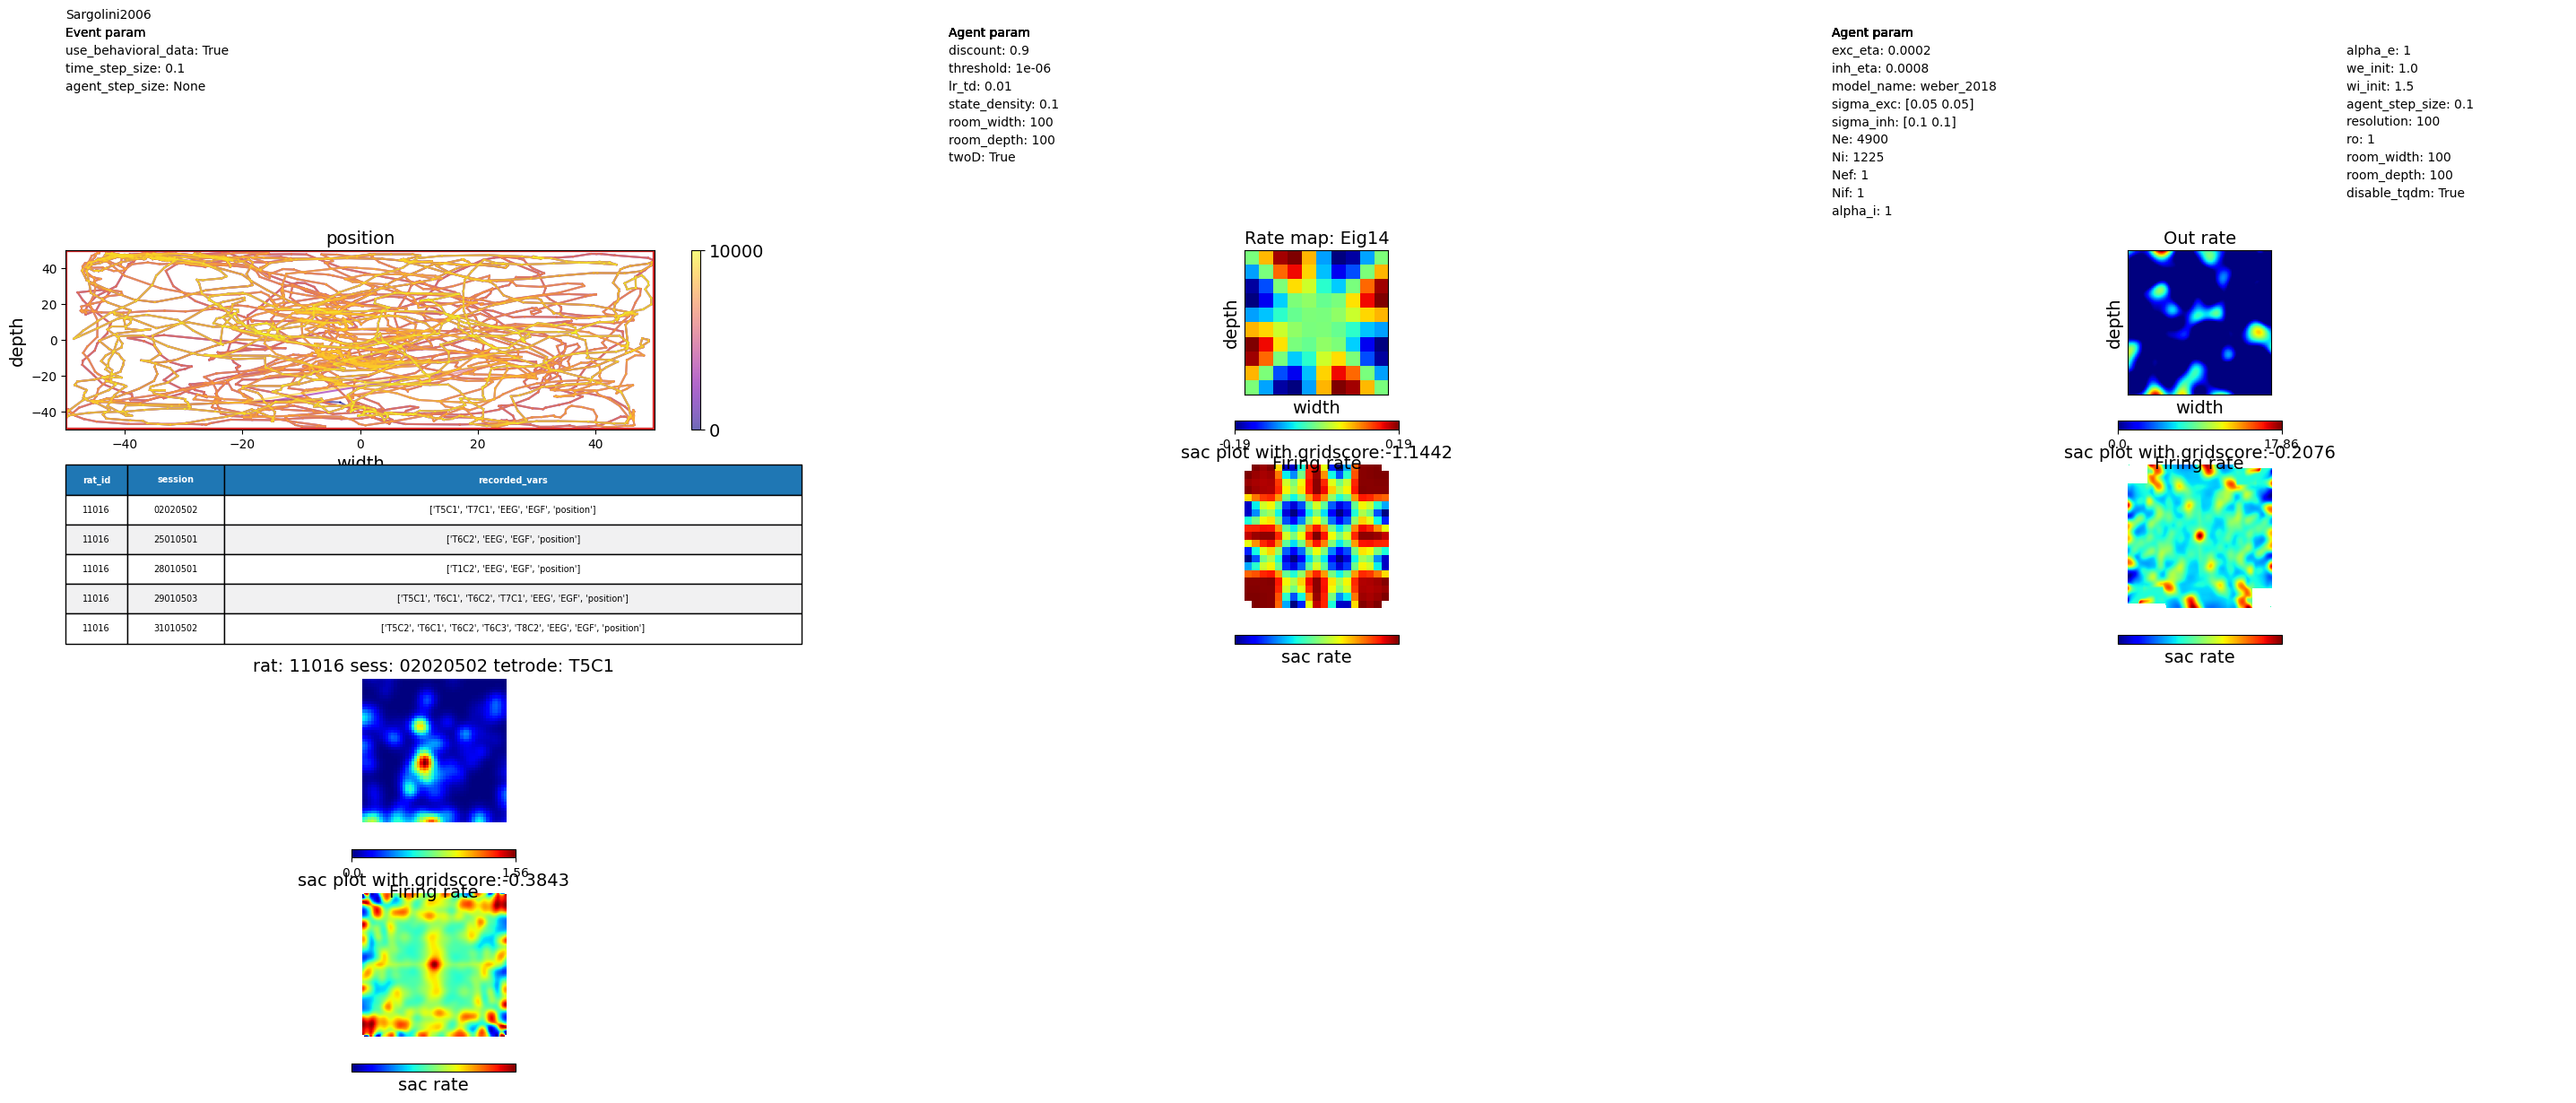

In [16]:


data_path = fetch_model_path("stachenfeld_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)


data_path = fetch_model_path("weber_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]

make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)


## Hafting environment

/Users/clementine/.NeuralPlayground/data/stachenfeld_2018_in_hafting2008/


/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/clementine/Documents/UCL/NeuralPlayground/neuralplayground/comparison/metrics.py:517: RuntimeWarning: All-NaN slice encountered
  in_range = (np.nanmin(image), np.nanmax(image))
/Users/clementine/Documents/UCL/NeuralPlayground/neuralplayground/comparison/metrics.py:521: UserWarning: One or more intensity levels are NaN. Rescaling will broadcast NaN to the full image. Provide intensity levels yourself to avoid this. E.g. with np.nanmin(image), np.nanmax(image).
  autoCorrMiddleRescaled = skimage.exposure.rescale_intensity(image, in_range, out_range)
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-pa

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig9'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>],
       [<Axes: title={'center': 'rat: 11015 sess: 13120410 tetrode: t5c1'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'rat: 11015 sess: 13120410 tetrode: t5c1'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:0.0098'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:0.009

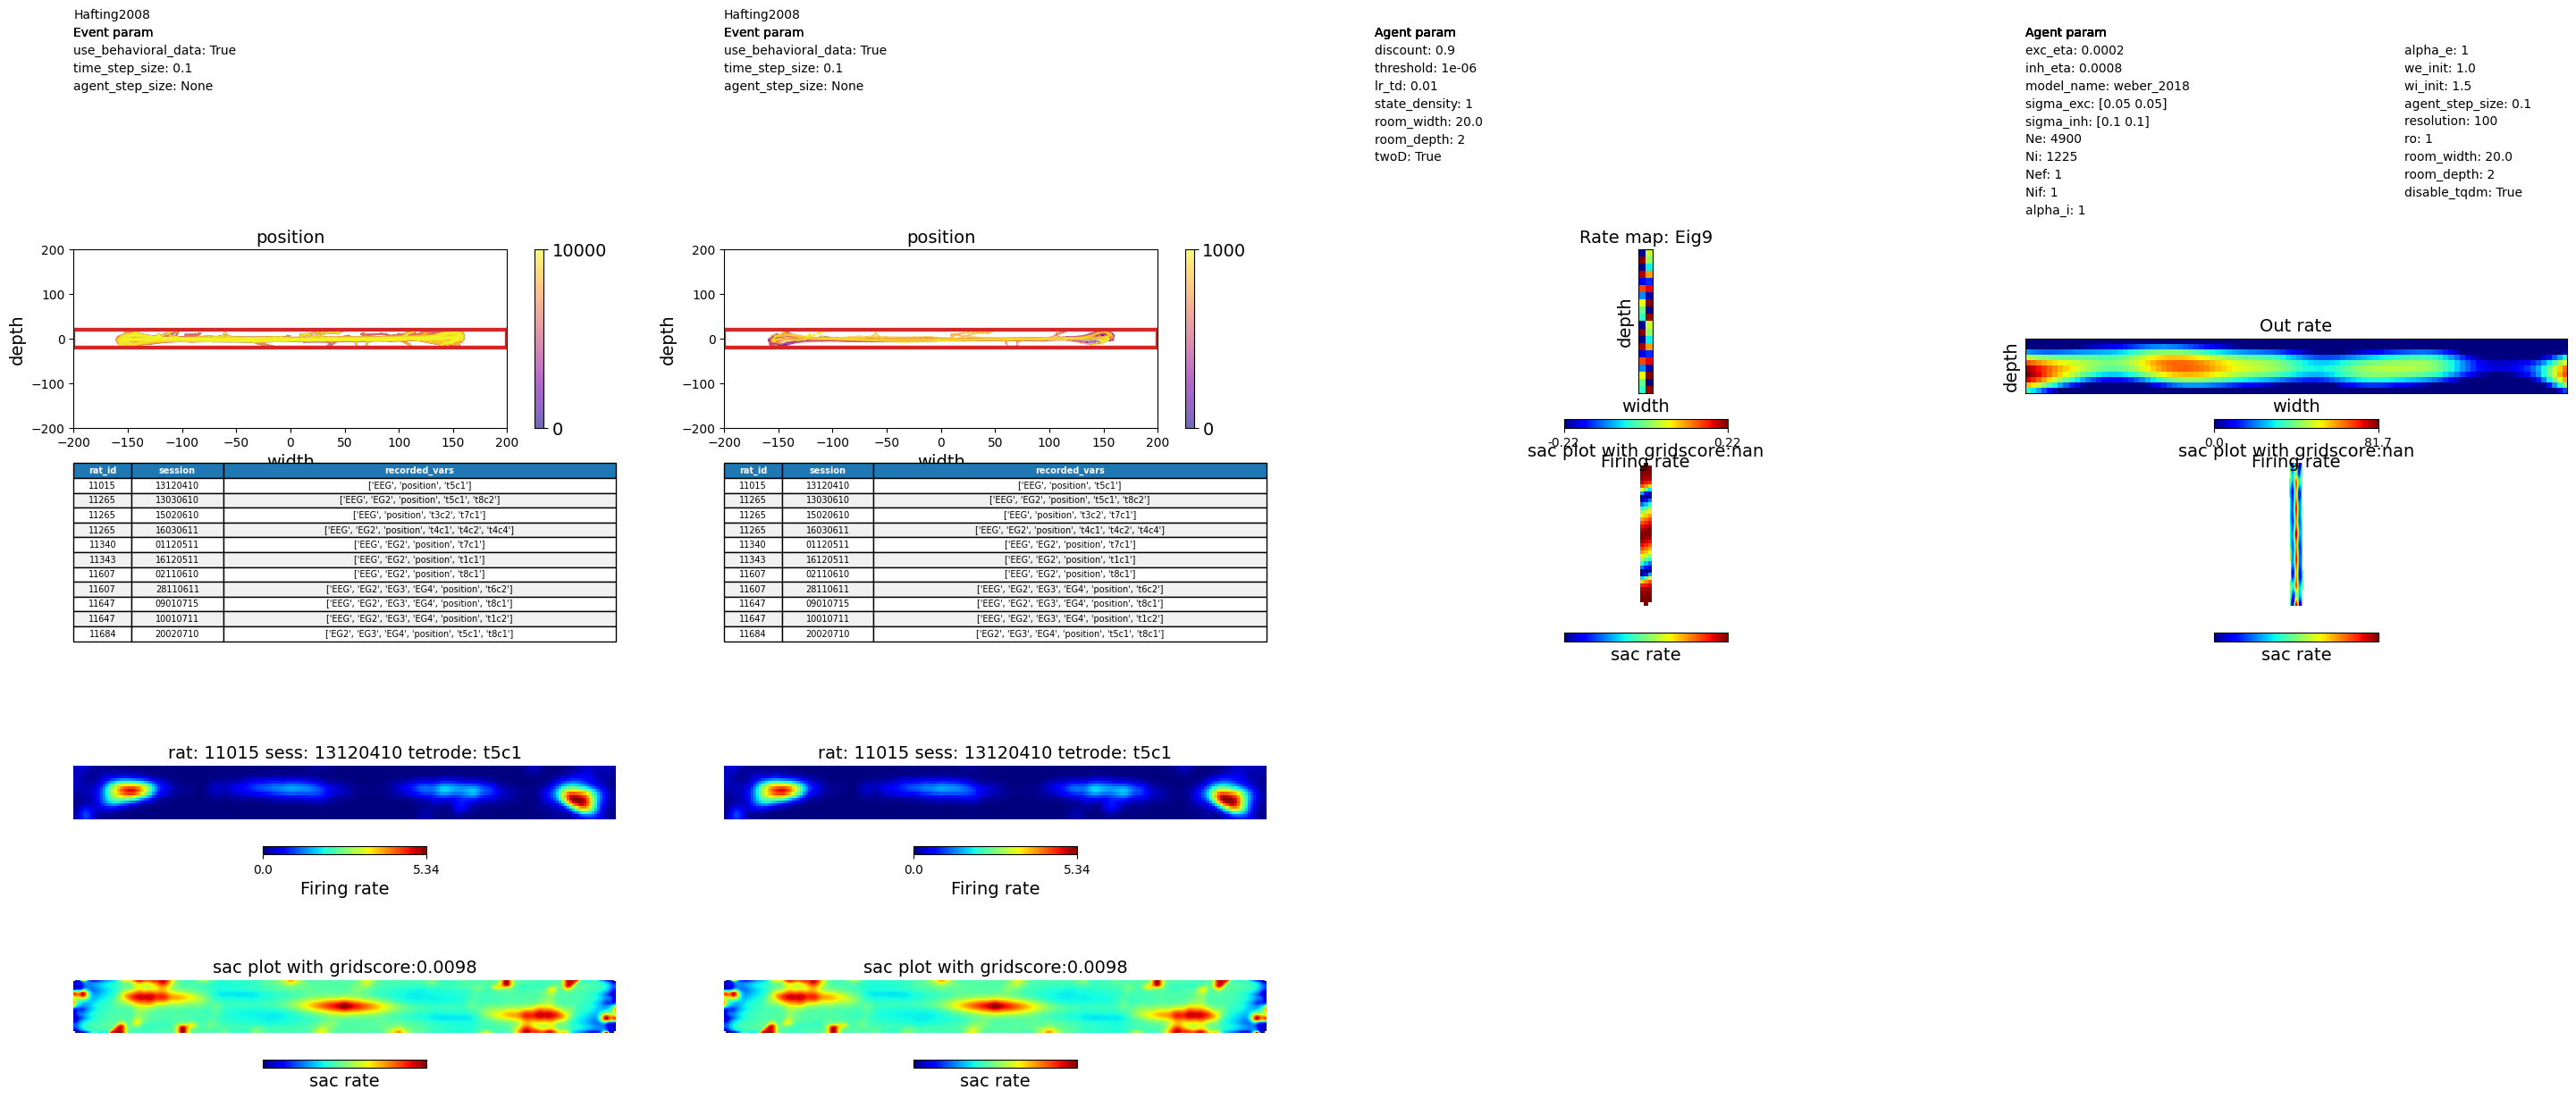

In [17]:

data_path = fetch_model_path("stachenfeld_2018_in_hafting2008")
print(data_path)
agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env_sr = pd.read_pickle(arena_path)



data_path = fetch_model_path("weber_2018_in_hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)

agents=[agent_sr,agent]
parameters=[param_sr,param]
env=[env_sr,env]


make_agent_comparison(env, parameters,agents,  recording_index=0,GridScorer=GridScorer)



# Train same agent in Different envs

We compare the same agent in different environements to compare their representations.


## Weber

In [ ]:
# Different Seed
data_path = fetch_model_path("weber_2018_in_hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


env_H = pd.read_pickle(arena_path)
agent_H = pd.read_pickle(agent_path)
param_H = pd.read_pickle(param_path)


data_path = fetch_model_path("weber_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)

# Different Seed

data_path = fetch_model_path("weber_2018_in_hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


env_H = pd.read_pickle(arena_path)
agent_H = pd.read_pickle(agent_path)
param_H = pd.read_pickle(param_path)

# Different Env

data_path = fetch_model_path("weber_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)



agents=[agent_2d,agent,agent_H]
parameters=[param_2d,param,param_H]
env=[env_2d,env, env_H]



make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)




## Stackenfeld

In [ ]:

data_path = fetch_model_path("stachenfeld_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)



data_path = fetch_model_path("stachenfeld_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_S = pd.read_pickle(agent_path)
param_S = pd.read_pickle(param_path)
env_S = pd.read_pickle(arena_path)

data_path = fetch_model_path("stachenfeld_2018_in_hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_sh = pd.read_pickle(agent_path)
param_sh = pd.read_pickle(param_path)
env_sh = pd.read_pickle(arena_path)



agents=[agent_2d,agent_S,agent_sh]
parameters=[param_2d,param_S,param_sh]
env=[env_2d,env_S,env_sh]


make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)


## Merging Room environment


In [ ]:

data_path = fetch_model_path("weber_2018_in_merging_room")


agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'



env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


data_path = fetch_model_path("weber_2018_in_wernle")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'



agent_W = pd.read_pickle(agent_path)
param_W = pd.read_pickle(param_path)
env_W = pd.read_pickle(arena_path)


agents=[agent_W,agent]
parameters=[param_W,param]
env=[env_W, env]
make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)








## Comparison from run agent

Here the agents are directly trained bellow and their results sent to be used in the comparison plots.

In [ ]:
from neuralplayground.agents import  Stachenfeld2018
from neuralplayground.arenas import Simple2D, MergingRoom, Sargolini2006, Hafting2008, BasicSargolini2006,Wernle2018
from neuralplayground.backend import default_training_loop, episode_based_training_loop


stachenfeld_in_2d_params = {
    "simulation_id": "stachenfeld_2018_in_simple2D",
    "agent_class": Stachenfeld2018,
    "env_class": Simple2D,
    "env_params": {
        "arena_x_limits": [-6, 6],
        "arena_y_limits": [-6, 6],
        "env_name": "env_example",
        "time_step_size": 0.2,
        "agent_step_size": 1,
    },
    "agent_params": {
        "discount": 0.9,
        "threshold": 1e-6,
        "lr_td": 1e-2,
        "state_density": 1,
        "room_width": 12,
        "room_depth": 12,
        "twoD": True,
    },
    "training_loop": episode_based_training_loop,
    "training_loop_params": {"t_episode": 10000, "n_episode": 1000},
}

agent =  Stachenfeld2018(discount=stachenfeld_in_2d_params["agent_params"]["discount"], t_episode=stachenfeld_in_2d_params["training_loop_params"]["t_episode"], n_episode=stachenfeld_in_2d_params["training_loop_params"]["n_episode"], threshold= stachenfeld_in_2d_params["agent_params"]["threshold"], lr_td=stachenfeld_in_2d_params["agent_params"]["lr_td"],
               room_width=stachenfeld_in_2d_params["agent_params"]["room_width"], room_depth=stachenfeld_in_2d_params["agent_params"]["room_depth"], state_density= stachenfeld_in_2d_params["agent_params"]["state_density"],twoD=stachenfeld_in_2d_params["agent_params"]["twoD"])


room_width = [-6,6]
room_depth = [-6,6]
env_name = "env_example"
time_step_size = 0.2
agent_step_size = 1
# Init environment

env = Simple2D(environment_name=stachenfeld_in_2d_params["env_params"]["env_name"],
               arena_x_limits = stachenfeld_in_2d_params["env_params"]["arena_x_limits"],
               arena_y_limits = stachenfeld_in_2d_params["env_params"]["arena_y_limits"],
               time_step_size = stachenfeld_in_2d_params["env_params"]["time_step_size"] ,
               agent_step_size = stachenfeld_in_2d_params["env_params"]["agent_step_size"])

agents=[agent]
parameters=[stachenfeld_in_2d_params]
env=[env]

make_agent_comparison(env, parameters,agents,GridScorer=GridScorer)



Now, we present an example using [Weber and Sprekeler 2018](https://elifesciences.org/articles/34560) model, and run it on a simulation that resembles the experimental setting of [Wernle et al. 2018](https://www.nature.com/articles/s41593-017-0036-6). This comparison is also done in their Weber and Sprekeler paper. We are simply showing it as an example of a comparison between results from a theoretical model and real data, which in principle can be done using other theoretical models implemented in the agent class, other arenas and experimental data.

Here, we initialize the environment. In the original experiment, the animal is allowed to explore one room (the one at the bottom in the following plots) for 2.5 hrs, then the animal is moved to the room at the top and allowed to explore for another 2.5 hrs, and finally the wall in between is removed, merging both rooms with the animal exploring it for 5 hrs. Here the main parameters that define the experiments are the ```switch_time```, which is the time in minutes where the agents is moved from one room to another and ```merging_time``` which tells us when the wall in between is changed. These parameters are used to estimate the number of total time steps running the simulation, and the environment itself will take care of the switching of the agent and removal of the wall based on these parameters.

In [ ]:
time_step_size = 0.2
merging_time = 270*2.0  # Time in minutes to remove 
switch_time = 270.0 # Time in minutes to move the mouse to the other side of the arena
additional_time = 270.0

n_steps = ((merging_time + switch_time + additional_time)*60) / time_step_size
fontsize = 16

room_width = [-10,10]
room_depth = [-10,10]
env_name = "merging_room"

# Init environment
env = MergingRoom(arena_x_limits = room_width,
                  arena_y_limits = room_depth,
                  time_step_size = time_step_size,
                  agent_step_size = agent_step_size,
                  merge_time = merging_time,
                  switch_time = switch_time)

print(n_steps)
print(int((merging_time*60)/time_step_size))
print(int((switch_time*60)/time_step_size))

Now we initialize the model using some of the parameters described in original publication.



In [ ]:
exc_eta = 1.3e-4
inh_eta = 5.3e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 2*4900
Ni = 2*1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.51
agent_step_size = 1.0
agent = Weber2018(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                  sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=1,
                  Nef=Nef, Nif=Nif, room_width=env.room_width, room_depth=env.room_depth,
                  alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)

agent.plot_rates()

Now, we update the parameters of the model using a training loop. Feel free to reduce the time of switch and merging, which gives less number of iterations as a results. To get nice results, run with these parameters and go for a cup of coffee (or two), as it is it will take around 30 minutes (depending on the machine you are using).

In [ ]:
obs, state = env.reset()

for j in tqdm(range(round(n_steps))):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    obs, state, reward = env.step(action)
    agent.update()
    # We plot the trajectory of the agent just right before switching and before merging
    # then we keep running the loop
    if j == int((switch_time*60)/time_step_size)-1:
        # plot trajectory
        ax = env.plot_trajectory(plot_every=100)
        ax.set_xlabel("width", fontsize=fontsize)
        ax.set_ylabel("depth", fontsize=fontsize)
        # If you like, you can save the current state of the agent using the save_agent method to load the agent later
        # agent.save_agent("pre_switch.agent")
        # plot rates
        agent.plot_rates()
        plt.savefig("pre_switch.pdf", bbox_inches="tight")
    if j == int((merging_time*60)/time_step_size)-1:
        # Same thing, plotting just before the merging of the rooms
        ax = env.plot_trajectory(plot_every=100)
        ax.set_xlabel("width", fontsize=fontsize)
        ax.set_ylabel("depth", fontsize=fontsize)
        agent.plot_rates()
        plt.savefig("pre_merge.pdf", bbox_inches="tight")
        # agent.save_agent("pre_merge.agent")

# Use the line below to save the agent and use it later        
# agent.save_agent("post_merge.agent")

In [ ]:
# Here we take the section of interaction history for the period after the merge
merged_history = env.history[int((merging_time*60)/time_step_size):]
# Note that the wall is already removed from the arena structure
ax = env.plot_trajectory(history_data=merged_history, plot_every=100)
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)

agent.plot_rates()
plt.savefig("post_merge.pdf", bbox_inches="tight")

In [ ]:
Ideally, you should see how some of the bombs in the rate map from each room also merge after removing the wall in between. This can be observed in the original dataset, which is also available in our package! Here we plot some of the rate maps before and after merging the rooms.

In [ ]:
w_data = Wernle2018Data()

In [ ]:
recording_list = w_data.show_data(full_dataframe=False)

In [ ]:
rates = w_data.plot_merging_comparison(session_index=(100, 125, 126, 127))
